In [1]:
import pandas as pd
import python.load_model as plm

from python.utils import project_path, zone_names

In [2]:
# Read predictors
climate_filenames = {"tgw": "zonal_T2C_historical_1980_2019"}
climate_data = "tgw"
temp_data_path = f"{project_path}/data/climate/{climate_data}/{climate_filenames[climate_data]}.csv"

# Read load data
load_data_path = f"{project_path}/data/nyiso/historical_load/combined/historical_load.csv"

# Load data
temp_data, load_data = plm.load_and_prepare_data(temp_data_path, load_data_path)

In [3]:
# Create a load predictor
predictor = plm.LoadPredictor() # Default: RandomForestRegressor

# from sklearn.neural_network import MLPRegressor
# predictor = plm.LoadPredictor(model=MLPRegressor(hidden_layer_sizes=(100, 100), random_state=42))

Now modeling: A
Modeling years: 2002 - 2020
Model for zone A saved to /home/fs01/dcl257/projects/acorn-julia/data/models/load_model_tgw_zoneA.pkl
Now modeling: B
Modeling years: 2002 - 2020
Model for zone B saved to /home/fs01/dcl257/projects/acorn-julia/data/models/load_model_tgw_zoneB.pkl
Now modeling: C
Modeling years: 2002 - 2020
Model for zone C saved to /home/fs01/dcl257/projects/acorn-julia/data/models/load_model_tgw_zoneC.pkl
Now modeling: D
Modeling years: 2002 - 2020
Model for zone D saved to /home/fs01/dcl257/projects/acorn-julia/data/models/load_model_tgw_zoneD.pkl
Now modeling: E
Modeling years: 2002 - 2020
Model for zone E saved to /home/fs01/dcl257/projects/acorn-julia/data/models/load_model_tgw_zoneE.pkl
Now modeling: F
Modeling years: 2002 - 2020
Model for zone F saved to /home/fs01/dcl257/projects/acorn-julia/data/models/load_model_tgw_zoneF.pkl
Now modeling: G
Modeling years: 2002 - 2020
Model for zone G saved to /home/fs01/dcl257/projects/acorn-julia/data/models/loa

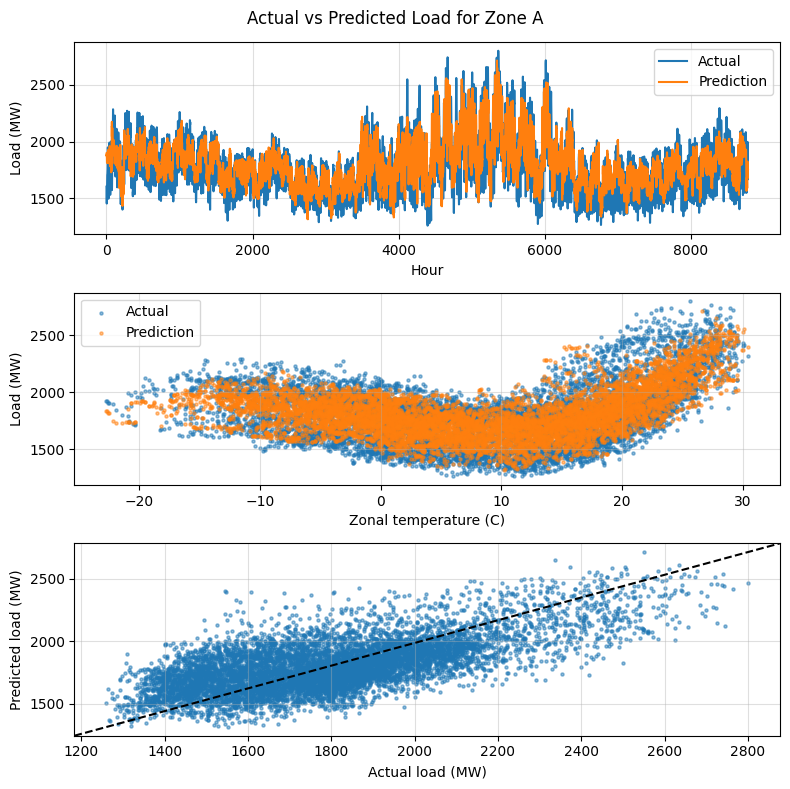

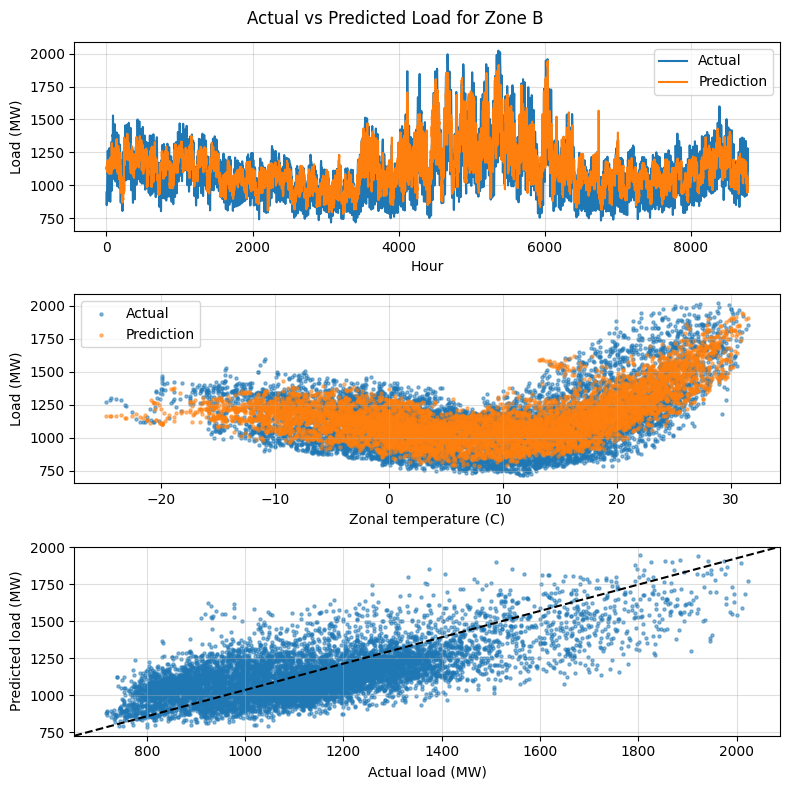

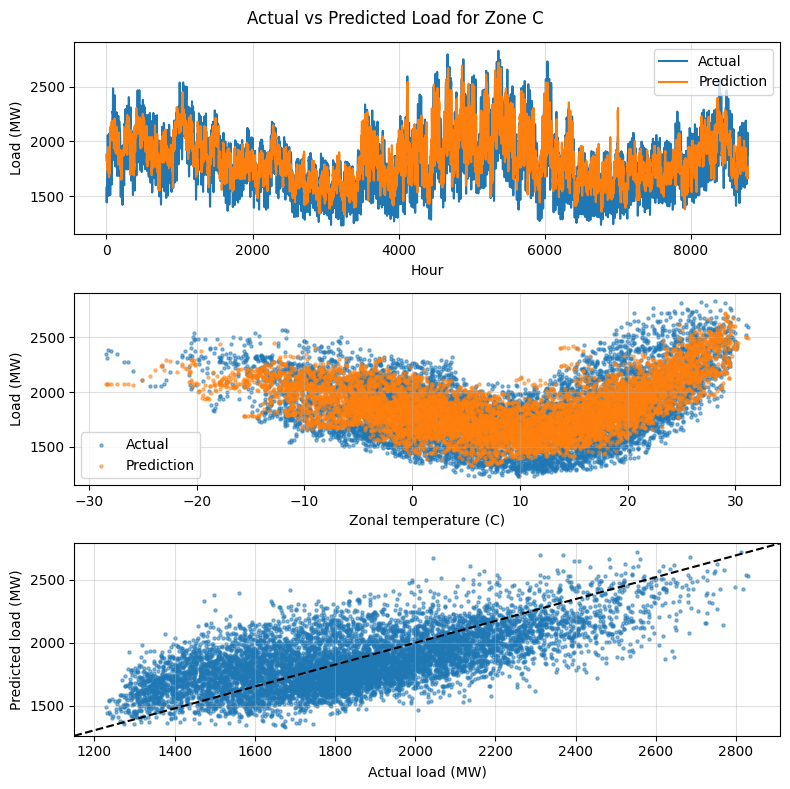

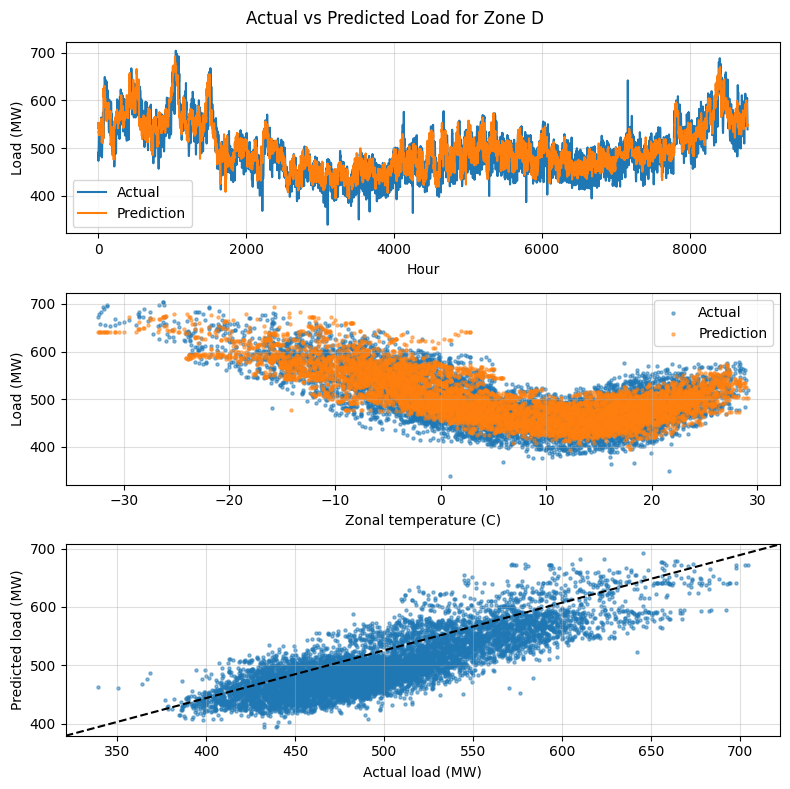

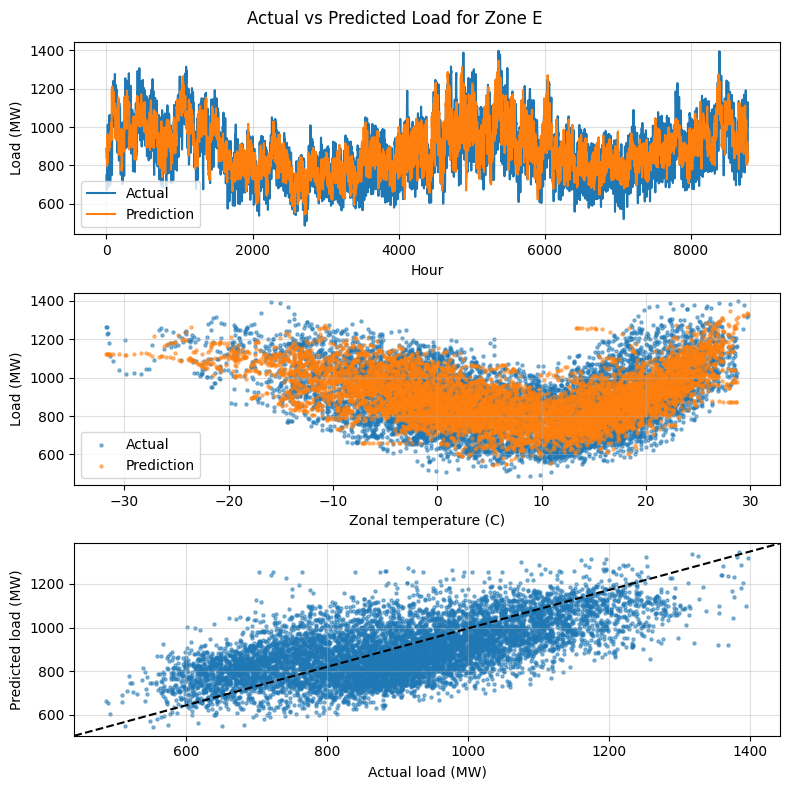

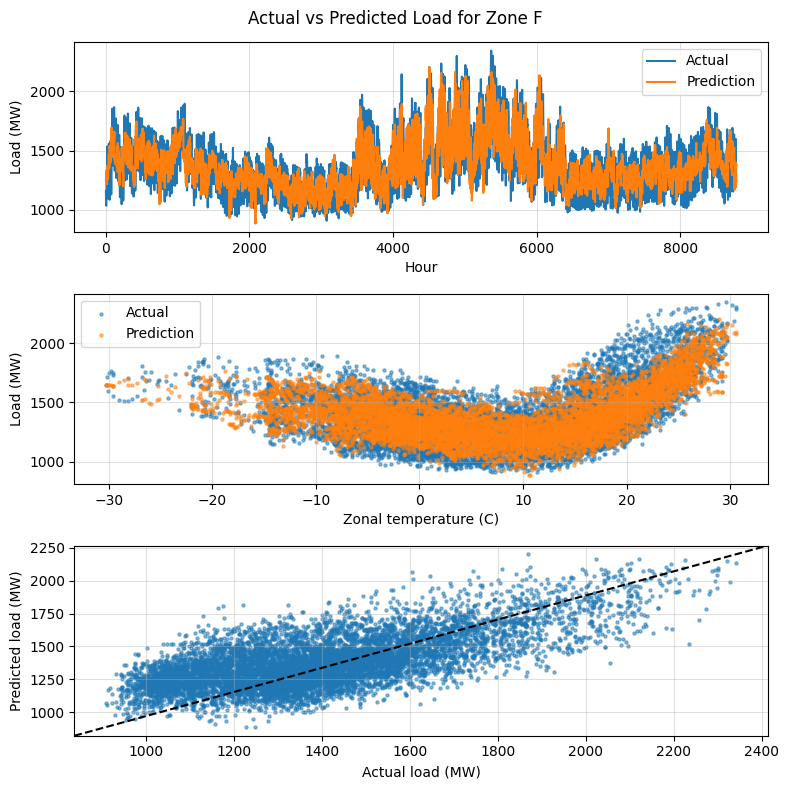

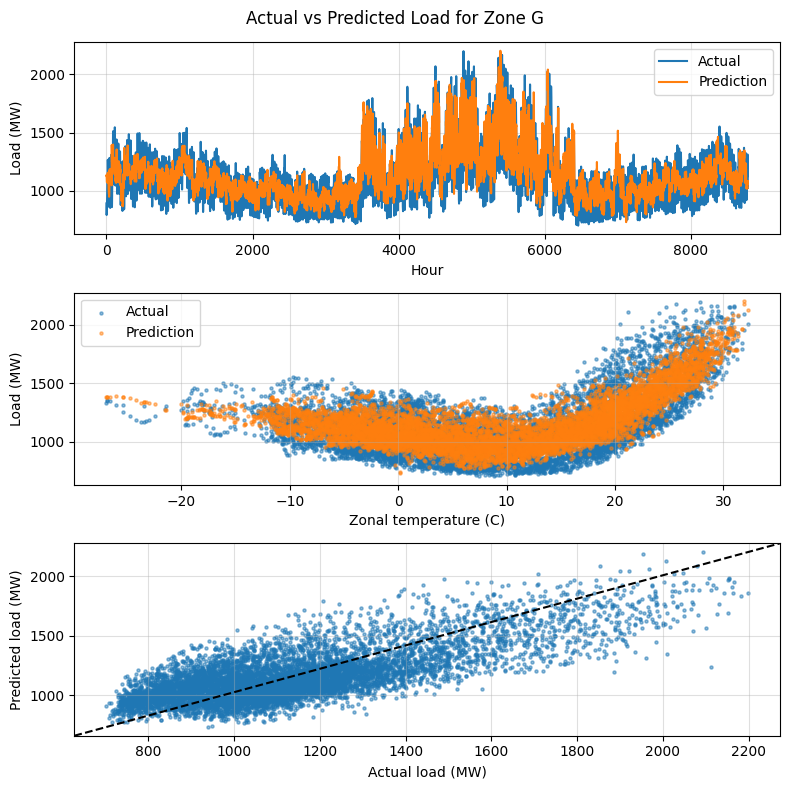

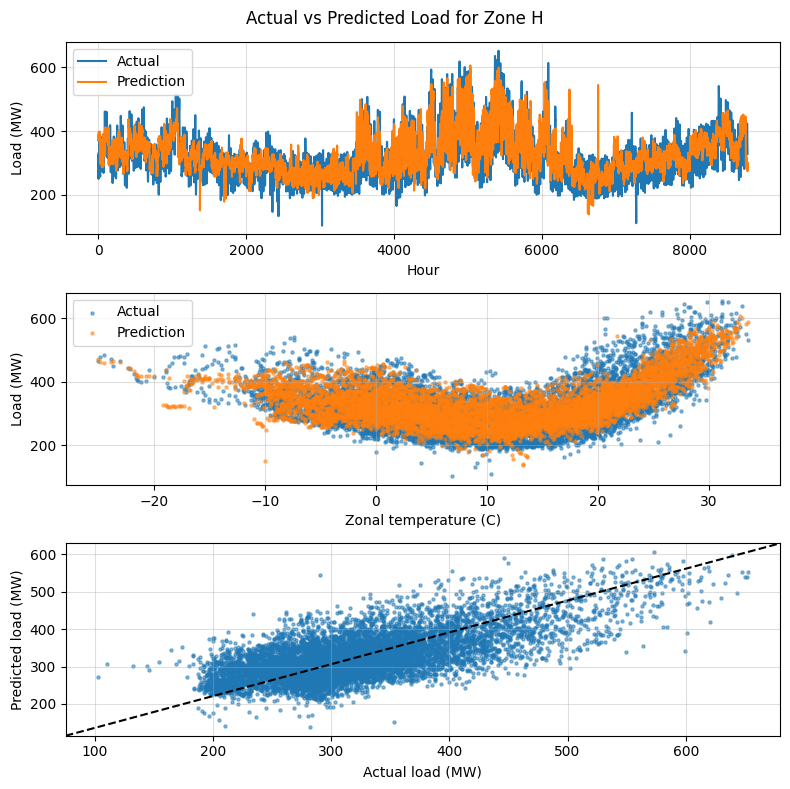

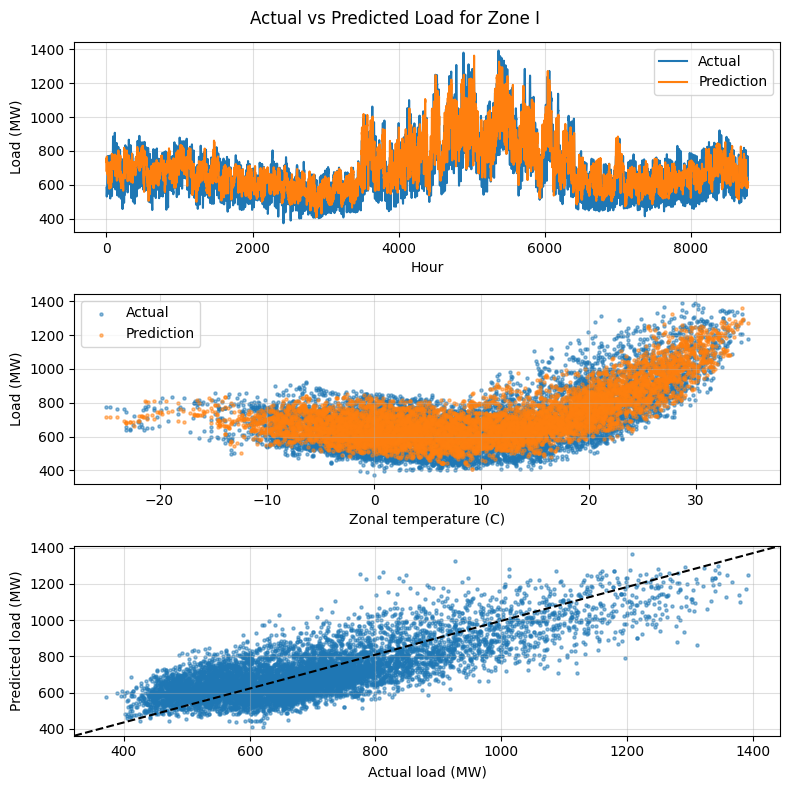

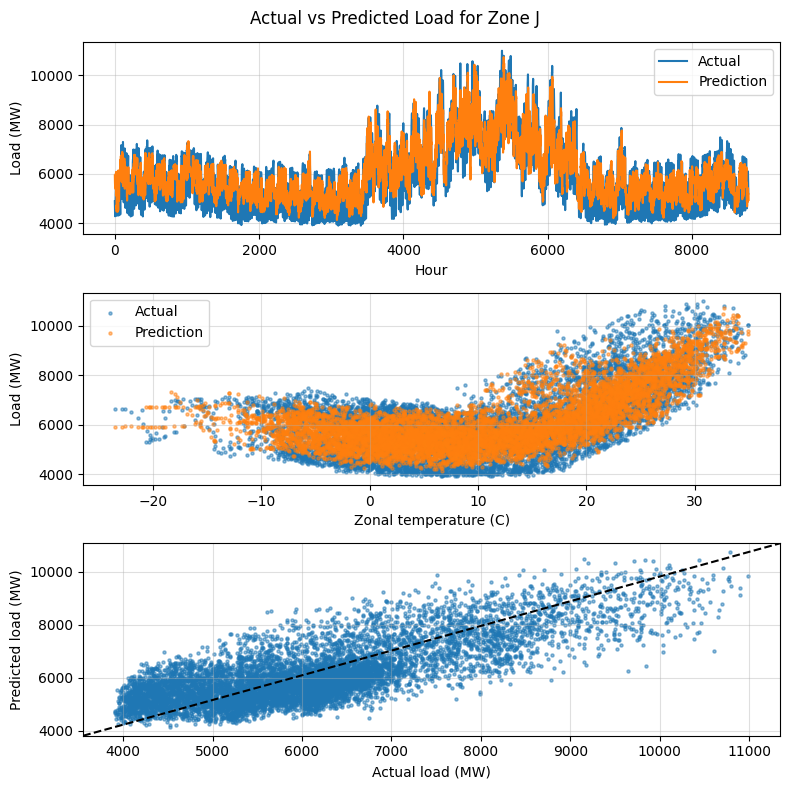

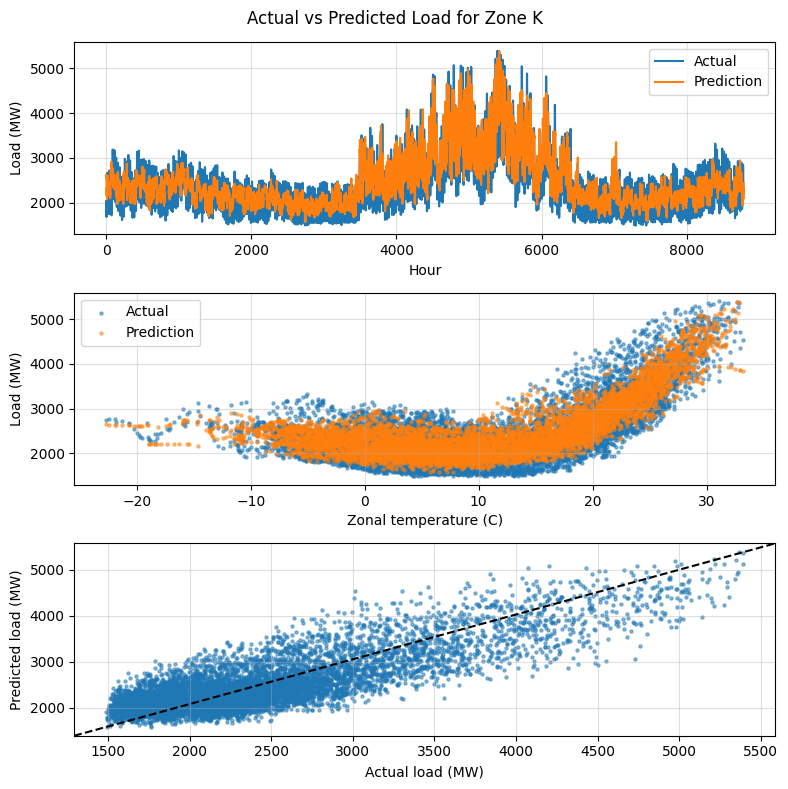

In [5]:
# Loop through all
for zone in zone_names:
    print(f"Now modeling: {zone}")
    # Train
    model = predictor.train(temp_data, load_data, zone, test_split=[2016])
    # Show results
    filepath = f"{project_path}/figs/load_model_{climate_data}_zone{zone}.pdf"
    predictor.plot_results(zone, filepath=filepath)
    # Save model
    filepath=f"{project_path}/data/models/load_model_{climate_data}_zone{zone}.pkl"
    predictor.save_model(zone, filepath=filepath)